In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv',sep=";")

In [3]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

**Preprocessing the data**

In [7]:
df["job"] = df["job"].astype('category')
df["marital"] = df["marital"].astype('category')
df["education"] = df["education"].astype('category')
df["default"] = df["default"].astype('category')
df["housing"] = df["housing"].astype('category')
df["loan"] = df["loan"].astype('category')
df["contact"] = df["contact"].astype('category')
df["month"] = df["month"].astype('category')
df["day_of_week"] = df["day_of_week"].astype('category')
df["poutcome"] = df["poutcome"].astype('category')
df["y"] = df["y"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['y'] = labelencoder.fit_transform(df['y'])

# Upsampling the dependent variable

In [9]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.y==0]
df_minority = df[df.y==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=36548,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.y.value_counts()

1    36548
0    36548
Name: y, dtype: int64

In [10]:
df_upsampled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36577,33,management,divorced,university.degree,no,yes,no,cellular,jun,wed,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,1
37277,38,admin.,single,high.school,no,yes,yes,cellular,aug,mon,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,1
9157,52,self-employed,married,basic.4y,unknown,no,yes,telephone,jun,fri,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,1
36369,25,admin.,single,university.degree,no,no,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,1


In [11]:
df1 = df.drop(columns = ['y'])

In [12]:
features = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [13]:
from sklearn.preprocessing import StandardScaler,Normalizer
sc = StandardScaler()
Norm = Normalizer()
df1 = sc.fit_transform(df_upsampled[features])
#X = Norm.fit_transform(X[features])

In [14]:
df_upsampled.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int32
dtype: object

In [15]:
X = df1
X

array([[ 1.30597253, -0.35023047, -0.56714014, ...,  0.71345043,
         1.00007526,  0.6361662 ],
       [ 1.38947829, -0.65995294, -0.56714014, ...,  0.71345043,
         1.00007526,  0.6361662 ],
       [-0.28063699, -0.44701874, -0.56714014, ...,  0.71345043,
         1.00007526,  0.6361662 ],
       ...,
       [ 0.97194947, -0.01838495, -0.14484697, ..., -0.29610014,
         1.05829719,  1.06349164],
       [-1.28270616,  0.0811687 , -0.56714014, ..., -0.10914633,
        -0.90272338, -0.68612382],
       [-0.69816581,  0.38536042, -0.56714014, ..., -0.01566943,
        -1.0980315 , -1.66056403]])

In [16]:
y = df_upsampled.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
36577    1
37277    1
9157     1
36369    1
40263    1
Name: y, Length: 73096, dtype: int32

In [17]:
from sklearn.utils import resample

In [18]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X = onehotencoder.fit_transform(X).toarray()

In [19]:
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Principal Component Analysis

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [21]:
X1 = principalDf
X1

,principal component 1,principal component 2
0,0.218648,1.868903
1,0.214771,1.867935
2,0.221654,1.871751
3,0.215269,1.870638
4,0.218501,1.868536
...,...,...
73091,0.208129,0.199676
73092,0.213873,0.201308
73093,-1.140842,-0.260525
73094,0.205342,0.201104


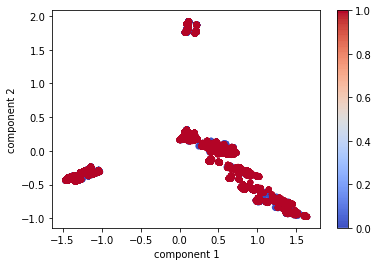

In [22]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=df_upsampled.y, 
            edgecolor='none', alpha=0.85,
            cmap=plt.cm.get_cmap('coolwarm'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [23]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#y = labelencoder.fit_transform(y)

In [24]:
y

0        0
1        0
2        0
3        0
4        0
        ..
36577    1
37277    1
9157     1
36369    1
40263    1
Name: y, Length: 73096, dtype: int32

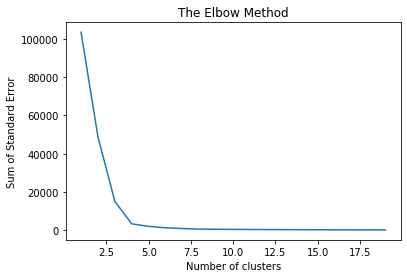

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Standard Error')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X1)

In [27]:
y_kmeans

array([0, 0, 0, ..., 2, 1, 1])

In [28]:
clustersDf = pd.DataFrame(y_kmeans)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([X1, clustersDf], axis = 1).reset_index()

In [29]:
combinedDf = combinedDf.drop(columns= 'index')

In [30]:
np.unique(combinedDf['cluster_predicted'])

array([0, 1, 2])

In [31]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

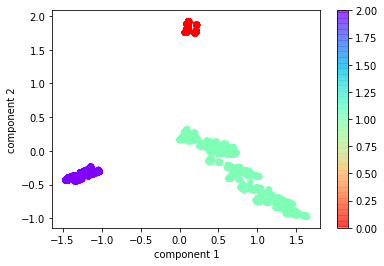

In [32]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=combinedDf['cluster_predicted'], 
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow_r'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [33]:
combinedDf

,principal component 1,principal component 2,cluster_predicted
0,0.218648,1.868903,0
1,0.214771,1.867935,0
2,0.221654,1.871751,0
3,0.215269,1.870638,0
4,0.218501,1.868536,0
...,...,...,...
73091,0.208129,0.199676,1
73092,0.213873,0.201308,1
73093,-1.140842,-0.260525,2
73094,0.205342,0.201104,1


In [35]:
y2 = combinedDf.iloc[:,-1]
y2

0        0
1        0
2        0
3        0
4        0
        ..
73091    1
73092    1
73093    2
73094    1
73095    1
Name: cluster_predicted, Length: 73096, dtype: int32

In [36]:
X2 = combinedDf.iloc[:,:-1]
X2

,principal component 1,principal component 2
0,0.218648,1.868903
1,0.214771,1.867935
2,0.221654,1.871751
3,0.215269,1.870638
4,0.218501,1.868536
...,...,...
73091,0.208129,0.199676
73092,0.213873,0.201308
73093,-1.140842,-0.260525
73094,0.205342,0.201104


In [37]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [39]:
# Initialising the ANN
classifier = Sequential()
# Relu
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))


Instructions for updating:
Colocations handled automatically by placer.


In [40]:
# Adding the second hidden layer
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [41]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
#Relu activation function Model fit
classifier_fit = classifier.fit(X_train2, y_train2,validation_data=(X_test2,y_test2), batch_size = 128, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Train on 51167 samples, validate on 21929 samples
Epoch 1/100
51167/51167 [==============================] - 1s 11us/step - loss: -3.6206 - accuracy: 0.6895 - val_loss: -4.8486 - val_accuracy: 0.6958
Epoch 2/100
51167/51167 [==============================] - 0s 9us/step - loss: -4.8394 - accuracy: 0.6964 - val_loss: -4.8489 - val_accuracy: 0.6958
Epoch 3/100
51167/51167 [==============================] - 0s 8us/step - loss: -4.8395 - accuracy: 0.6964 - val_loss: -4.8490 - val_accuracy: 0.6958
Epoch 4/100
51167/51167 [==============================] - 0s 8us/step - loss: -4.8396 - accuracy: 0.6964 - val_loss: -4.8490 - val_accuracy: 0.6958
Epoch 5/100
51167/51167 [==============================] - 0s 9us/step - loss: -4.8396 - accuracy: 0.6964 - val_loss: -4.8490 - val_accuracy: 0.6958
Epoch 6/100
51167/51167 [==============================] - 0s 9us/step - loss: -4.8397 - accuracy: 0.6964 - val_loss: -4.8491 - val_accuracy: 0.6958
Epoch 7

51167/51167 [==============================] - 1s 11us/step - loss: -4.8397 - accuracy: 0.6964 - val_loss: -4.8491 - val_accuracy: 0.6958
Epoch 54/100
51167/51167 [==============================] - 1s 11us/step - loss: -4.8397 - accuracy: 0.6964 - val_loss: -4.8491 - val_accuracy: 0.6958
Epoch 55/100
51167/51167 [==============================] - 1s 12us/step - loss: -4.8397 - accuracy: 0.6964 - val_loss: -4.8491 - val_accuracy: 0.6958
Epoch 56/100
51167/51167 [==============================] - 1s 12us/step - loss: -4.8397 - accuracy: 0.6964 - val_loss: -4.8491 - val_accuracy: 0.6958
Epoch 57/100
51167/51167 [==============================] - 1s 12us/step - loss: -4.8397 - accuracy: 0.6964 - val_loss: -4.8491 - val_accuracy: 0.6958
Epoch 58/100
51167/51167 [==============================] - 1s 13us/step - loss: -4.8397 - accuracy: 0.6964 - val_loss: -4.8491 - val_accuracy: 0.6958
Epoch 59/100
51167/51167 [==============================] - 1s 13us/step - loss: -4.8397 - accuracy: 0.6964

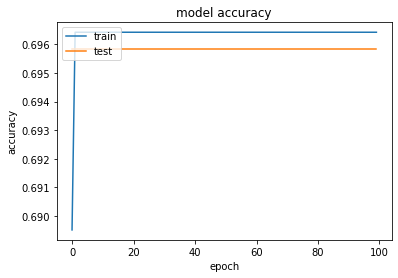

In [47]:
# summarize history for accuracy
plt.plot(classifier_fit.history['accuracy'])
plt.plot(classifier_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ICA

In [44]:
from sklearn.decomposition import FastICA

In [45]:
fs_ica = FastICA(n_components=2,random_state=0)

In [46]:
X_transformed = fs_ica.fit_transform(X)

In [48]:
X_transformed

array([[ 0.00231892, -0.00871681],
       [ 0.00230256, -0.00871476],
       [ 0.00233321, -0.00872835],
       ...,
       [-0.0047944 ,  0.00048918],
       [ 0.00098165, -0.00081912],
       [ 0.00085254, -0.00061783]])

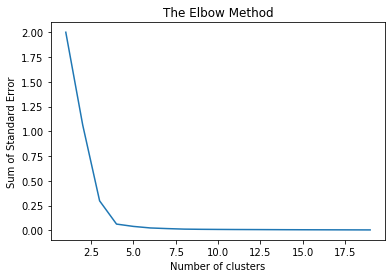

In [48]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Standard Error')
plt.show()

In [50]:
kmeans_1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans_1.fit_predict(X_transformed)

In [51]:
y_kmeans1

array([0, 0, 0, ..., 1, 0, 0])

In [52]:
clustersDf1 = pd.DataFrame(y_kmeans1)
X_transformed = pd.DataFrame(X_transformed)
clustersDf1.columns = ['cluster_predicted']
combinedDf1 = pd.concat([X_transformed, clustersDf1], axis = 1).reset_index()

In [53]:
combinedDf1 = combinedDf1.drop(columns= 'index')
combinedDf1

,0,1,cluster_predicted
0,0.002319,-0.008717,0
1,0.002303,-0.008715,0
2,0.002333,-0.008728,0
3,0.002307,-0.008727,0
4,0.002318,-0.008715,0
...,...,...,...
73091,0.000992,-0.000811,0
73092,0.001016,-0.000814,0
73093,-0.004794,0.000489,1
73094,0.000982,-0.000819,0


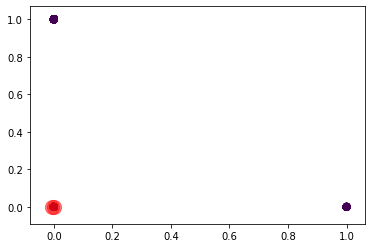

In [54]:
plt.scatter(X[:, 0], X[:, 4], c=y_kmeans1, s=50, cmap='viridis')

centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [55]:
y3 = combinedDf1.iloc[:,-1]
y3

X3 = combinedDf1.iloc[:,:-1]
X3

from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.3, random_state = 0)


# Initialising the ANN
classifier = Sequential()
# Relu
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))
# Adding the second hidden layer
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Relu activation function Model fit
classifier_fit = classifier.fit(X_train3, y_train3,validation_data=(X_test3,y_test3), batch_size = 128, epochs = 100)

Train on 51167 samples, validate on 21929 samples
Epoch 1/100
51167/51167 [==============================] - 1s 12us/step - loss: 0.6196 - accuracy: 0.6955 - val_loss: 0.6069 - val_accuracy: 0.6958
Epoch 2/100
51167/51167 [==============================] - 0s 9us/step - loss: 0.5790 - accuracy: 0.6964 - val_loss: 0.4957 - val_accuracy: 0.6958
Epoch 3/100
51167/51167 [==============================] - 0s 9us/step - loss: 0.2514 - accuracy: 0.9172 - val_loss: 0.0767 - val_accuracy: 1.0000
Epoch 4/100
51167/51167 [==============================] - 0s 9us/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 5/100
51167/51167 [==============================] - 0s 9us/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 6/100
51167/51167 [==============================] - 0s 9us/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/100
51167/51167 [==============================] - 0s 9us/s

51167/51167 [==============================] - 1s 11us/step - loss: 1.2738e-07 - accuracy: 1.0000 - val_loss: 1.2584e-07 - val_accuracy: 1.0000
Epoch 54/100
51167/51167 [==============================] - 1s 11us/step - loss: 1.2298e-07 - accuracy: 1.0000 - val_loss: 1.2166e-07 - val_accuracy: 1.0000
Epoch 55/100
51167/51167 [==============================] - 1s 11us/step - loss: 1.2013e-07 - accuracy: 1.0000 - val_loss: 1.1857e-07 - val_accuracy: 1.0000
Epoch 56/100
51167/51167 [==============================] - 1s 11us/step - loss: 1.1748e-07 - accuracy: 1.0000 - val_loss: 1.1619e-07 - val_accuracy: 1.0000
Epoch 57/100
51167/51167 [==============================] - 1s 11us/step - loss: 1.1506e-07 - accuracy: 1.0000 - val_loss: 1.1419e-07 - val_accuracy: 1.0000
Epoch 58/100
51167/51167 [==============================] - 1s 11us/step - loss: 1.1346e-07 - accuracy: 1.0000 - val_loss: 1.1283e-07 - val_accuracy: 1.0000
Epoch 59/100
51167/51167 [==============================] - 1s 11us/ste

# Random Projections

In [58]:
from sklearn import random_projection
rp = random_projection.SparseRandomProjection(n_components=3)

In [59]:
X_transformed1 = rp.fit_transform(X[:, :1671])
X_transformed1

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -3.69133521]])

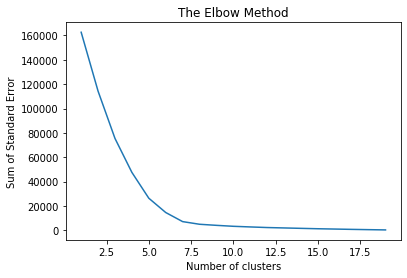

In [60]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_transformed1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Standard Error')
plt.show()

In [61]:
kmeans_2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans_2.fit_predict(X_transformed1)

In [62]:
clustersDf2 = pd.DataFrame(y_kmeans2)
X_transformed1 = pd.DataFrame(X_transformed1)
clustersDf2.columns = ['cluster_predicted']
combinedDf2 = pd.concat([X_transformed1, clustersDf2], axis = 1).reset_index()

In [63]:
combinedDf2 = combinedDf2.drop(columns= 'index')

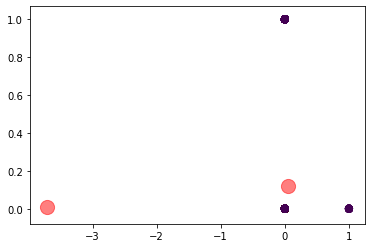

In [64]:
plt.scatter(X[:, 0], X[:, 4], c=y_kmeans2, s=50, cmap='viridis')

centers = kmeans_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [65]:
combinedDf2

,0,1,2,cluster_predicted
0,0.0,0.0,0.000000,0
1,0.0,0.0,0.000000,0
2,0.0,0.0,0.000000,0
3,0.0,0.0,0.000000,0
4,0.0,0.0,0.000000,0
...,...,...,...,...
73091,0.0,0.0,0.000000,0
73092,0.0,0.0,0.000000,0
73093,0.0,0.0,0.000000,0
73094,0.0,0.0,0.000000,0


In [69]:
y4 = combinedDf2.iloc[:,-1]
y4

X4 = combinedDf2.iloc[:,:-1]
X4

from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.3, random_state = 0)


# Initialising the ANN
classifier = Sequential()
# Relu
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
# Adding the second hidden layer
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Relu activation function Model fit
#classifier_fit = classifier.fit(X_train4, y_train4,validation_data=(X_test4,y_test4, batch_size=128, epochs=100)

In [70]:
#Relu activation function Model fit
classifier_fit = classifier.fit(X_train4, y_train4,validation_data=(X_test4,y_test4), batch_size = 128, epochs = 100)

Train on 51167 samples, validate on 21929 samples
Epoch 1/100
51167/51167 [==============================] - 2s 47us/step - loss: 0.1019 - accuracy: 0.9956 - val_loss: 7.2387e-04 - val_accuracy: 1.0000
Epoch 2/100
51167/51167 [==============================] - 1s 28us/step - loss: 3.6160e-04 - accuracy: 1.0000 - val_loss: 1.7982e-04 - val_accuracy: 1.0000
Epoch 3/100
51167/51167 [==============================] - 2s 42us/step - loss: 1.2000e-04 - accuracy: 1.0000 - val_loss: 7.9232e-05 - val_accuracy: 1.0000
Epoch 4/100
51167/51167 [==============================] - 2s 37us/step - loss: 5.8967e-05 - accuracy: 1.0000 - val_loss: 4.3416e-05 - val_accuracy: 1.0000
Epoch 5/100
51167/51167 [==============================] - 2s 30us/step - loss: 3.4254e-05 - accuracy: 1.0000 - val_loss: 2.6729e-05 - val_accuracy: 1.0000
Epoch 6/100
51167/51167 [==============================] - 2s 30us/step - loss: 2.1836e-05 - accuracy: 1.0000 - val_loss: 1.7667e-05 - val_accuracy: 1.0000
Epoch 7/100
51167/

Epoch 53/100
51167/51167 [==============================] - 2s 32us/step - loss: 1.0094e-07 - accuracy: 1.0000 - val_loss: 1.0095e-07 - val_accuracy: 1.0000
Epoch 54/100
51167/51167 [==============================] - 2s 32us/step - loss: 1.0094e-07 - accuracy: 1.0000 - val_loss: 1.0095e-07 - val_accuracy: 1.0000
Epoch 55/100
51167/51167 [==============================] - 2s 35us/step - loss: 1.0095e-07 - accuracy: 1.0000 - val_loss: 1.0095e-07 - val_accuracy: 1.0000
Epoch 56/100
51167/51167 [==============================] - 2s 32us/step - loss: 1.0095e-07 - accuracy: 1.0000 - val_loss: 1.0095e-07 - val_accuracy: 1.0000
Epoch 57/100
51167/51167 [==============================] - 2s 30us/step - loss: 1.0094e-07 - accuracy: 1.0000 - val_loss: 1.0095e-07 - val_accuracy: 1.0000
Epoch 58/100
51167/51167 [==============================] - 2s 31us/step - loss: 1.0094e-07 - accuracy: 1.0000 - val_loss: 1.0095e-07 - val_accuracy: 1.0000
Epoch 59/100
51167/51167 [==============================] 

# Splitting the data

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 0)

In [128]:
y_train.shape[0]

51167

In [129]:
X_train.shape[0]

51167

# Neural Network Implementation

In [130]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [131]:
# Initialising the ANN
classifier = Sequential()


In [132]:
# Initialising the ANN
classifier = Sequential()
# Relu
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))


In [135]:
# Adding the second hidden layer
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [136]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [137]:
#Relu activation function Model fit
classifier_fit = classifier.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 128, epochs = 100)

Train on 51167 samples, validate on 21929 samples
Epoch 1/100
51167/51167 [==============================] - 1s 14us/step - loss: 0.6066 - accuracy: 0.6958 - val_loss: 0.5812 - val_accuracy: 0.6988
Epoch 2/100
51167/51167 [==============================] - 0s 10us/step - loss: 0.5804 - accuracy: 0.7062 - val_loss: 0.5764 - val_accuracy: 0.7070
Epoch 3/100
51167/51167 [==============================] - 0s 9us/step - loss: 0.5782 - accuracy: 0.7076 - val_loss: 0.5749 - val_accuracy: 0.7091
Epoch 4/100
51167/51167 [==============================] - 0s 9us/step - loss: 0.5766 - accuracy: 0.7084 - val_loss: 0.5770 - val_accuracy: 0.7087
Epoch 5/100
51167/51167 [==============================] - 0s 9us/step - loss: 0.5743 - accuracy: 0.7085 - val_loss: 0.5715 - val_accuracy: 0.7066
Epoch 6/100
51167/51167 [==============================] - 0s 10us/step - loss: 0.5722 - accuracy: 0.7076 - val_loss: 0.5689 - val_accuracy: 0.7072
Epoch 7/100
51167/51167 [==============================] - 0s 9us

Epoch 56/100
51167/51167 [==============================] - 1s 12us/step - loss: 0.5512 - accuracy: 0.7325 - val_loss: 0.5519 - val_accuracy: 0.7284
Epoch 57/100
51167/51167 [==============================] - 1s 12us/step - loss: 0.5512 - accuracy: 0.7311 - val_loss: 0.5531 - val_accuracy: 0.7306
Epoch 58/100
51167/51167 [==============================] - 1s 13us/step - loss: 0.5513 - accuracy: 0.7324 - val_loss: 0.5519 - val_accuracy: 0.7291
Epoch 59/100
51167/51167 [==============================] - 1s 15us/step - loss: 0.5512 - accuracy: 0.7321 - val_loss: 0.5546 - val_accuracy: 0.7250
Epoch 60/100
51167/51167 [==============================] - 1s 15us/step - loss: 0.5514 - accuracy: 0.7324 - val_loss: 0.5513 - val_accuracy: 0.7307
Epoch 61/100
51167/51167 [==============================] - 1s 15us/step - loss: 0.5513 - accuracy: 0.7318 - val_loss: 0.5510 - val_accuracy: 0.7299
Epoch 62/100
51167/51167 [==============================] - 1s 15us/step - loss: 0.5511 - accuracy: 0.7317

In [138]:
# list all data in history
print(classifier_fit.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


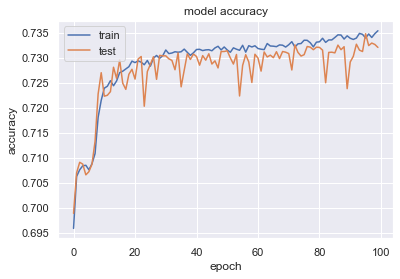

In [139]:
# summarize history for accuracy
plt.plot(classifier_fit.history['accuracy'])
plt.plot(classifier_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [140]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [141]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9332 1513]
 [4363 6721]]


In [142]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred,target_names=target_names))
print(cm)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76     10845
           1       0.82      0.61      0.70     11084

    accuracy                           0.73     21929
   macro avg       0.75      0.73      0.73     21929
weighted avg       0.75      0.73      0.73     21929

[[9332 1513]
 [4363 6721]]


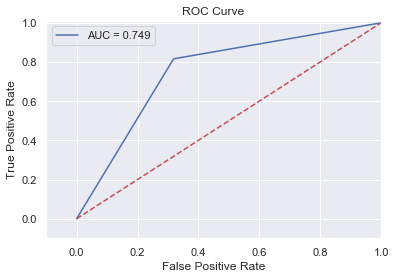

In [143]:
from sklearn.metrics import roc_curve,auc
#from sklearn import metrics
def roc_auc(y_test,y_pred):
    sns.set()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr,tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend()
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
roc_auc(y_pred,y_test)